# Clean and extract information obtained through surveys done by beneficaries
Clean the translated beneficiary document (the one translated) and check the dependancy between the different parts.

Features:

- kitchen
- location
- donor
- age
- type
- social status
- how many times
- how important food

Modification in terms of names:

- a loyal mountain. - jebel awlial
- amderman - um duman
- east nile - bahri
- island - gazeera
- Khartoum - khartoum
- Snar! - sinnar

## Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Code

In [2]:
# read data
beneficiary = pd.read_excel('../output/translated_beneficiary_survey_oct_2024.xlsx')
#Select the columns to study
beneficiary = beneficiary[['Kitchen', 'Location (local)', 'The donor side.', 'Age',
                           'Type', 'Social status (are you alone or with the family)',
                           'How many times do you get meals from central kitchens?', 
                           'How important are kitchens available to you and your family compared to other food sources available to you?']]

## renama columns
beneficiary.columns = ['kitchen_translated_name', 'translated_location', 'donor', 'age', 
                       'gender', 'social_status', 'frequence_of_coming', 'kitchen_dependancy']

# Clean column by column 
# kitchen_translated_name nothing to do - we could change later

# translated_location - match localtity or state from the kitchen_ids_cluster
beneficiary.loc[beneficiary['translated_location'] == 'A loyal mountain.', 'translated_location'] = 'Jebel Awlia'
beneficiary.loc[beneficiary['translated_location'] == 'Amderman.', 'translated_location'] = 'Um Durman'
beneficiary.loc[beneficiary['translated_location'] == 'Khartoum', 'translated_location'] = 'Khartoum'
beneficiary.loc[beneficiary['translated_location'] == 'Snar!', 'translated_location'] = 'Sinnar'
beneficiary.loc[beneficiary['translated_location'] == 'East Nile', 'translated_location'] = 'Sharg An Neel'
beneficiary.loc[beneficiary['translated_location'] == 'Island', 'translated_location'] = 'Gazeera'
print('Location available: ', beneficiary['translated_location'].unique())

## Donor - nothing to do 
print('Possible donor: ', beneficiary['donor'].unique())

## Clean Age
modification = [('18-30.', 'Between 18 to 30'),
                ('31 - 50', 'Between 31 to 50'),
                ('Less than 18', 'Less than 18'),
                ('and above 51', 'Over than 51')]

for element in modification:
    beneficiary['age'] = beneficiary['age'].replace(element[0], element[1])
print('Possible age: ', beneficiary['age'].unique())

## Clean Gender
modification = [('Female', 'F'),
                ('Male', 'M')]

for element in modification:
    beneficiary['gender'] = beneficiary['gender'].replace(element[0], element[1])
print('Possible gender: ', beneficiary['gender'].unique())

## Clean Social Status
modification = [('Alone.', 'Alone'),
                ('With the family.', 'Family')]

for element in modification:
    beneficiary['social_status'] = beneficiary['social_status'].replace(element[0], element[1])
print('Possible social_status: ', beneficiary['social_status'].unique())

## Clean Nb times meals kitchens - frequence_of_coming
modification = [('Daily', 'Daily'),
                ('Several times a week.', 'Several time per week'), 
               ('Sometimes.', 'Sometimes'),
               ('Weekly', 'Weekly')]

for element in modification:
    beneficiary['frequence_of_coming'] = beneficiary['frequence_of_coming'].replace(element[0], element[1])

print('Possible frequence_of_coming: ', beneficiary['frequence_of_coming'].unique())

## Clean kitchen_dependancy
modification = [("Important; we use existing kitchens with other, rather important, food sources; we have alternative food sources, but we take advantage of existing kitchens.", 
                        'Important'),
                ("It's a little important; we have alternative food sources, but we use existing kitchens.", 'Little Important'),
                ('We use present kitchens with other sources of food.', 'Important'),
                ('Very important; we rely only on kitchens present, important; we use kitchens present with other sources of food, rather important; we have alternative sources of food, but we take advantage of kitchens present.', 
                         'Very Important'),
                ('Very important. We only rely on present kitchens.', 'Very Important'),
                ('Very important; we rely only on kitchens present, important; we use kitchens present with other sources of food.', 
                     'Very Important'),
                ('Very important; we rely only on present, rather important kitchens; we have alternative food sources, but we take advantage of existing kitchens.',
                     'Very Important'),
                ("It's a little important; we have alternative sources of food, but we use existing, important kitchens; we use present, with other sources of food.", 
                     'Little Important'),
                ('Very important; we rely only on present, rather important kitchens; we have alternative sources of food, but we take advantage of existing, important kitchens; we use present, with other sources of food.',
                     'Very Important'),
                ('Very important; we rely only on existing, rather important, kitchens; we have alternative sources of food, but we take advantage of existing, important kitchens; we use existing, with other, non-important, kitchens to get food.', 
                         'Very Important'),
               ]
for element in modification:
    beneficiary['kitchen_dependancy'] = beneficiary['kitchen_dependancy'].replace(element[0], element[1])

print('Possible kitchen_dependancy: ', beneficiary['kitchen_dependancy'].unique())

Location available:  ['Jebel Awlia' 'Um Durman' 'Khartoum' 'Sinnar' 'Sharg An Neel' 'Gazeera']
Possible donor:  ['WFP' 'UNDP']
Possible age:  ['Over than 51' 'Between 31 to 50' 'Less than 18' 'Between 18 to 30' nan]
Possible gender:  ['F' 'M' nan]
Possible social_status:  ['Family' 'Alone' nan]
Possible frequence_of_coming:  ['Daily' 'Several time per week' 'Sometimes' nan 'Weekly']
Possible kitchen_dependancy:  ['Important' 'Little Important' 'Very Important' nan]


In [3]:
## Save document
beneficiary.to_excel('../output/kitchen_beneficiary.xlsx', index = False)

## Visualization

First we want to compare the number of response per locations but also compare this number to the number of kitchen per location to have an idea.

In [4]:
# We need to read the kictchen_ids_cluster file to calculate the number of kitchens per location
kitchen_ids_cluster = pd.read_excel('../output/kitchen_ids_cluster.xlsx')
## Calculate number of kitchen
nbs = []
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_locality'] == 'Jebel Awlia']))
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_locality'] == 'Um Durman']))
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_locality'] == 'Khartoum']))
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_state'] == 'Sinnar']))
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_locality'] == 'Sharg An Neel']))
nbs.append(len(kitchen_ids_cluster.loc[kitchen_ids_cluster['kitchen_state'] == 'Gazeera']))

nbs = pd.DataFrame(nbs)
nbs['location'] = ['Jebel Awlia', 'Um Durman', 'Khartoum', 'Sinnar', 'Sharg An Neel', 'Gazeera']
nbs.columns = ['nbs_kitchen', 'location']

## calculate number of values per location
counts = beneficiary['translated_location'].value_counts()
counts = counts.reset_index()
counts.columns = ['location', 'nbs_benef']

## calculate number of kitchen per location
counts_kitchen = beneficiary.groupby(['kitchen_translated_name', 'translated_location']).size().reset_index(name='Counts')['translated_location'].value_counts()
counts_kitchen = counts_kitchen.reset_index()
counts_kitchen.columns = ['location', 'nbs_kitchen_answered']

## Merge both
results = pd.merge(nbs, counts, on='location', how='left')
results = pd.merge(results, counts_kitchen, on='location', how='left')
print(results)

   nbs_kitchen       location  nbs_benef  nbs_kitchen_answered
0           54    Jebel Awlia        194                    15
1            4      Um Durman        100                     9
2           60       Khartoum         27                     3
3            1         Sinnar         11                     1
4           19  Sharg An Neel          6                     1
5           14        Gazeera         79                     1


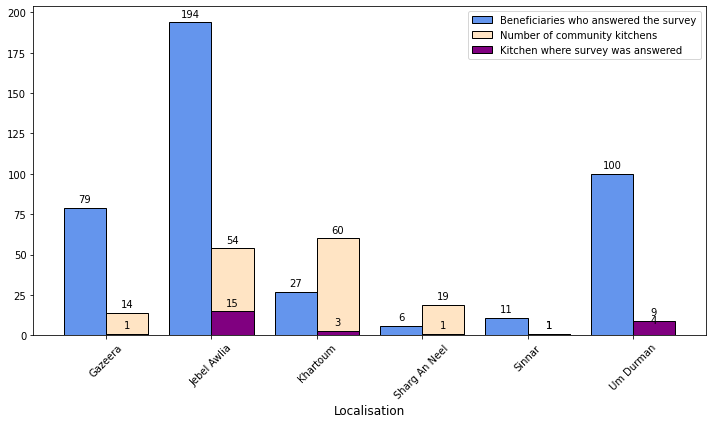

In [5]:
# Sort the DataFrame by translated_location alphabetically
results = results.sort_values(by='location')

# Set figure size
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.4

# Bar positions
x = range(len(results))  # Positions for locations
x_answ = [pos + bar_width / 2 for pos in x]
x_benef = [pos - bar_width / 2 for pos in x]
x_kitchen = [pos + bar_width / 2 for pos in x]


# Plot bars for nbs_benef
plt.bar(x_benef, results['nbs_benef'], width=bar_width, label='Beneficiaries who answered the survey', color='cornflowerblue', edgecolor='black')

# Plot bars for nbs_kitchen
plt.bar(x_kitchen, results['nbs_kitchen'], width=bar_width, label='Number of community kitchens', color='bisque', edgecolor='black')

# Plot bars for nbs_kitchen
plt.bar(x_answ, results['nbs_kitchen_answered'], width=bar_width, label='Kitchen where survey was answered', color='purple', edgecolor='black')

# Add numbers on top of bars for nbs_benef
for i, value in enumerate(results['nbs_benef']):
    plt.text(x_benef[i], value + 2, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add numbers on top of bars for nbs_kitchen
for i, value in enumerate(results['nbs_kitchen']):
    plt.text(x_kitchen[i], value + 2, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add numbers on top of bars for nbs_kitchen
for i, value in enumerate(results['nbs_kitchen_answered']):
    plt.text(x_answ[i], value + 2, str(value), ha='center', va='bottom', fontsize=10, color='black')

# Add labels, title, and legend
plt.xlabel('Localisation', fontsize=12)
#plt.ylabel('Counts', fontsize=12)
#plt.title('Number of beneficiaries and kitchen by location', fontsize=14)
plt.xticks(x, results['location'], rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('../visualization/benef_answered_kitchens.png', dpi=300)

# Show the plot
plt.show()



Second we want to plot per location the different frequence 

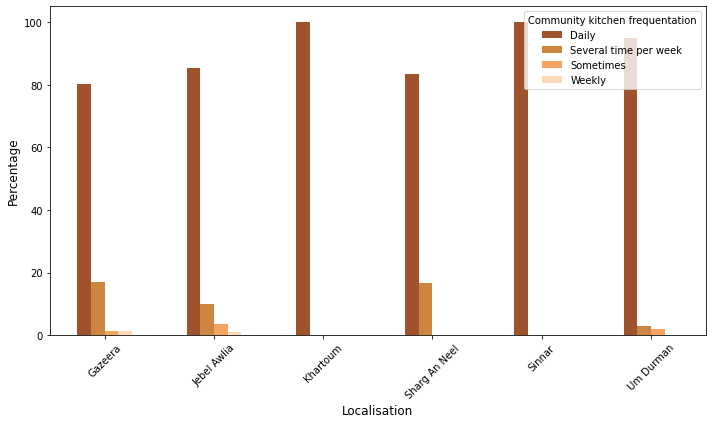

In [6]:
## calculate frequency
frequency = beneficiary.groupby(['translated_location', 'frequence_of_coming']).size().reset_index(name='Counts')

# Sort the DataFrame by translated_location alphabetically
frequency = frequency.sort_values(by='translated_location')

# Pivot the DataFrame to get counts per location and frequency of coming
pivot_df = frequency.pivot(index='translated_location', columns='frequence_of_coming', values='Counts')

# Calculate percentages for each location
pivot_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define custom colors for each frequency
colors = ['sienna', 'peru', 'sandybrown', 'peachpuff']  # Custom colors for each category

# Plot the data
pivot_percentage.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Add labels and title
plt.xlabel('Localisation', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Community kitchen frequentation')

plt.savefig('../visualization/frequentation_kitchens.png', dpi=300)

# Show the plot
plt.show()

Third, plot the  kitchen_dependancy

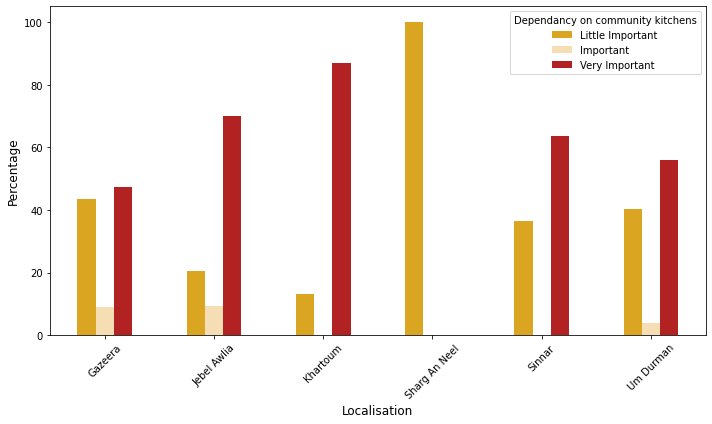

In [8]:
## calculate frequency
dependancy = beneficiary.groupby(['translated_location', 'kitchen_dependancy']).size().reset_index(name='Counts')

# Sort the DataFrame by translated_location alphabetically
dependancy = dependancy.sort_values(by='translated_location')

# Pivot the DataFrame to get counts per location and frequency of coming
pivot_df = dependancy.pivot(index='translated_location', columns='kitchen_dependancy', values='Counts')

# Calculate percentages for each location
pivot_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define custom colors for each frequency
colors = ['goldenrod', 'wheat', 'firebrick']  # Custom colors for each category

# Plot the data
pivot_percentage.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Add labels and title
plt.xlabel('Localisation', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
#plt.title('Counts by Location and kitchen_dependancy', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
# Order the legend based on a custom list (e.g., alphabetically by frequency)
ordered_legend_labels = ['Little Important', 'Important', 'Very Important']
# Change legend title and order
plt.legend(title='Dependancy on community kitchens', labels=ordered_legend_labels)

plt.savefig('../visualization/dependancy_kitchens.png', dpi=300)

# Show the plot
plt.show()

